# Project 7: Properties of a Wall as a Thermal Insulator
## 7.4 Exercises
***

Importing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin,cos,exp

## Numerical Procedures - Finite Difference Method (FD)

In [2]:
def fp3(x, h, fun):
    """
    Calculates the first derivative of a given function at a specified point
    using the three-point formula.

    Parameters
    ----------
    x : float
        The point at which to evaluate the derivative.
    h : float
        The step size.
    fun : callable
        The function to differentiate.

    Returns
    -------
    float
        The numerical approximation of the first derivative of the function
        at the specified point.

    """
    return (fun(x + h) - fun(x - h)) / 2.0 / h

def fpp3(x, h, fun):
    """
    Calculates the second derivative of a given function at a specified point
    using the three-point formula.

    Parameters
    ----------
    x : float
        The point at which to evaluate the derivative.
    h : float
        The step size.
    fun : callable
        The function to differentiate.

    Returns
    -------
    float
        The numerical approximation of the second derivative of the function
        at the specified point.

    """
    return (fun(x + h) + fun(x - h) - 2.0 * fun(x)) / h ** 2

def get_data(func):
    xl = -10.0
    xr = 10.0
    npoints = 1000
    h = (xr - xl) / (npoints - 1)

    xarr = []
    yarr = []
    deriv = []

    for i in range(0, npoints + 1):
        x = xl + i * h
        xarr.append(x)
        yarr.append(func(x))
        deriv.append(fp3(x, h, func))

    plt.figure(figsize=(10, 6))
    plt.plot(xarr, yarr, 'b-', label='function {}'.format(str(func)))
    plt.plot(xarr, deriv, 'r-', label='derivative')
    plt.legend()
    plt.show()

## 7.4.1 Plotting Selected Thermal Conductivity Functions D(x) and Their Derivatives D'(x)

In [3]:
def linear(x):
    return 2 * x + 5

def parabolic(x):
    return 2 * x ** 2 + 4 * x + 5

def sinus(x):
    return x * sin(x) + 10

def step_function(x):
    return D1 / (1 + exp((x - param_b) / tau)) + D0


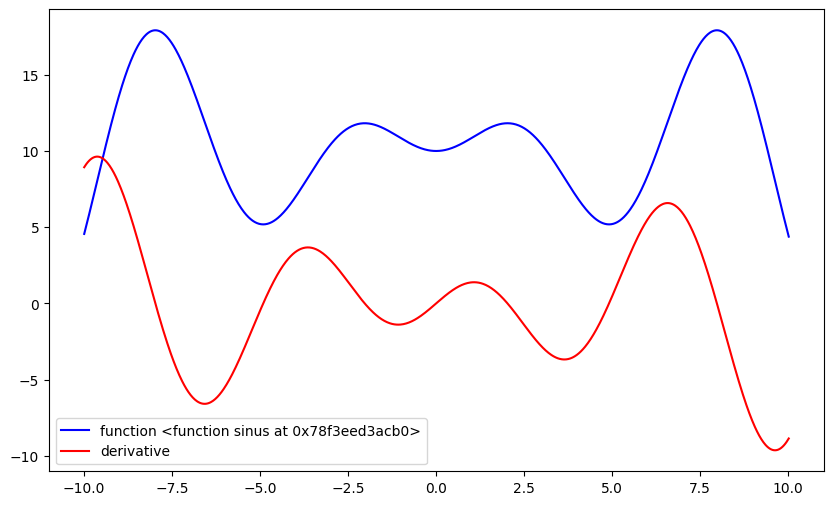

In [4]:
get_data(sinus)

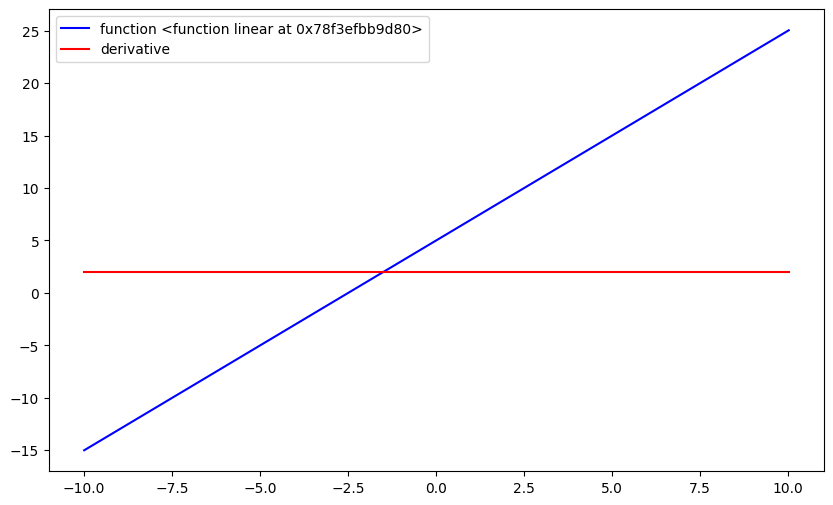

In [5]:
get_data(linear)

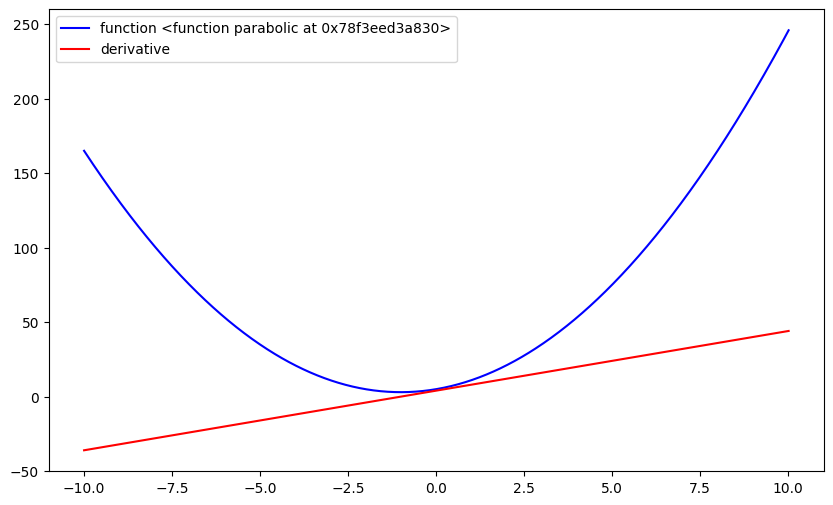

In [6]:
get_data(parabolic)

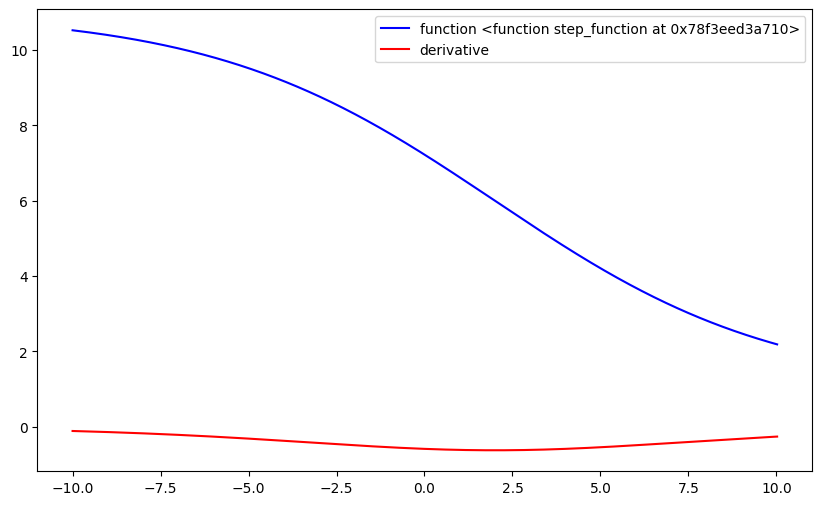

In [7]:
D1 = 10
D0 = 1
param_b = 2
tau = 4
get_data(step_function)

## 7.4.2 Implementation of the DIFFUSION function and the MYPLOT function allowing for tests with different boundary values and different network parameter values

In [8]:
def diffusion(func, fi0, fiN, D1, D0, xl, xr):
    N = 10000
    n_lst = np.arange(0, N, 1)

    D = []
    D_prim = []
    x_lst = []
    h = (xr - xl) / N

    for i in range(0, N):
        x = xl + i * h
        x_lst.append(x)
        D.append(func(x))
        D_prim.append(fp3(x, h, func))

    A_minus = [di - h * dpi / 2.0 for di, dpi in zip(D, D_prim)]
    A_plus = [di + h * dpi / 2.0 for di, dpi in zip(D, D_prim)]
    A_zero = [-2.0 * di for di in D]
    b = [0.0 for i in n_lst]


    fi = [fi0]

    alfa = [0.0, 0.0]
    beta = [0.0, fiN]
    gamma = [0.0]

    for i in range(len(n_lst) - 2):
        gamma.append(-1.0 / (A_zero[len(n_lst) - 2 - i]
                             + A_plus[len(n_lst) - 2 - i] * alfa[i + 1]))
        alfa.append(A_minus[len(n_lst) - 2 - i] * gamma[i + 1])
        beta.append((A_plus[len(n_lst) - 2 - i] * beta[i + 1]
                     - b[len(n_lst) - 2 - i]) * gamma[i + 1])

    alfa.reverse()
    beta.reverse()
    gamma.reverse()

    for i in range(len(n_lst) - 2):
        fi.append(alfa[i] * fi[i] + beta[i])
    fi.append(fiN)

    return x_lst, fi, D


def myplot(x, temp, D, name):
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax1.set_title("""Temperature Distribution Across the Wall for Thermal Conductivity
    Described by '{}' Function""".format(name), fontsize=15)

    color = 'tab:red'
    ax1.set_ylabel('temperature', color=color, fontsize=15)
    ax1.plot(x, temp, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()

    color = 'tab:blue'
    ax2.set_ylabel('thermal conductivity', color=color, fontsize=15)
    ax2.plot(x, D, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.show()

## 7.4.3 Temperature Distributions Across the Wall <br>for Thermal Conductivities Described by Functions from Exercise 7.4.1

In [9]:
fi_0 = 20.0
fi_N = 1.0

D_1 = 5
D_0 = 1
param_b = 3
tau = 0.05

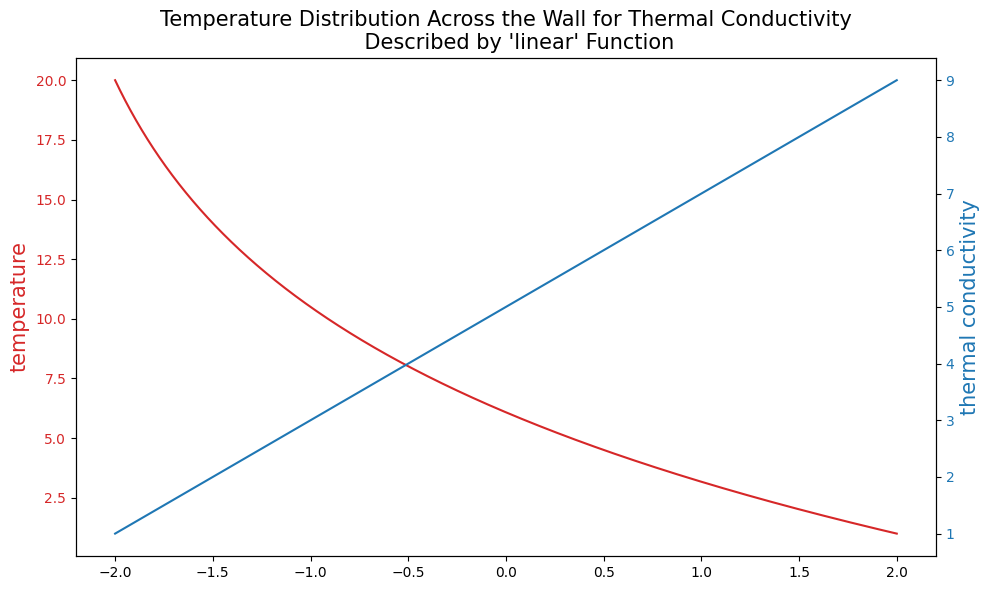

In [10]:
x, FI, Dval = diffusion(linear, fi_0, fi_N, D_1, D_0, -2.0, 2.0)
myplot(x, FI, Dval, 'linear')

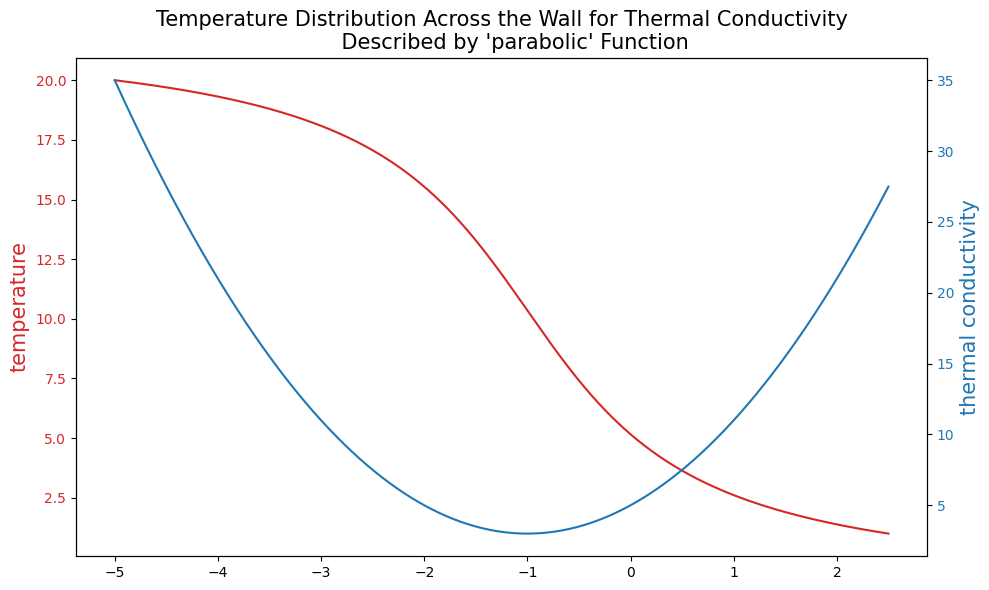

In [11]:
x, FI, Dval = diffusion(parabolic, fi_0, fi_N, D_1, D_0, -5.0, 2.5)
myplot(x, FI, Dval, 'parabolic')

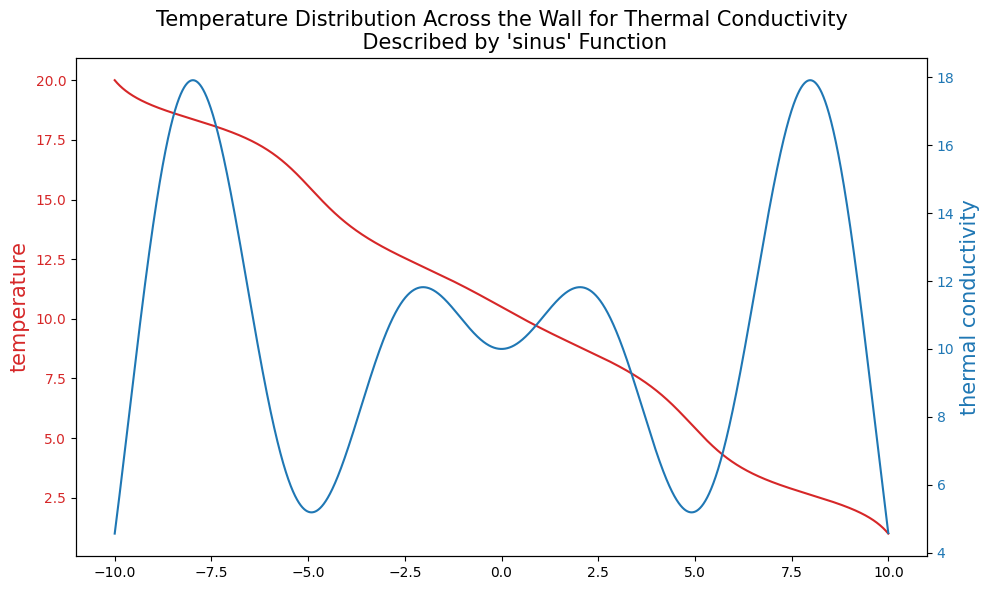

In [12]:
x, FI, Dval = diffusion(sinus, fi_0, fi_N, D_1, D_0, -10.0, 10.0)
myplot(x, FI, Dval, 'sinus')

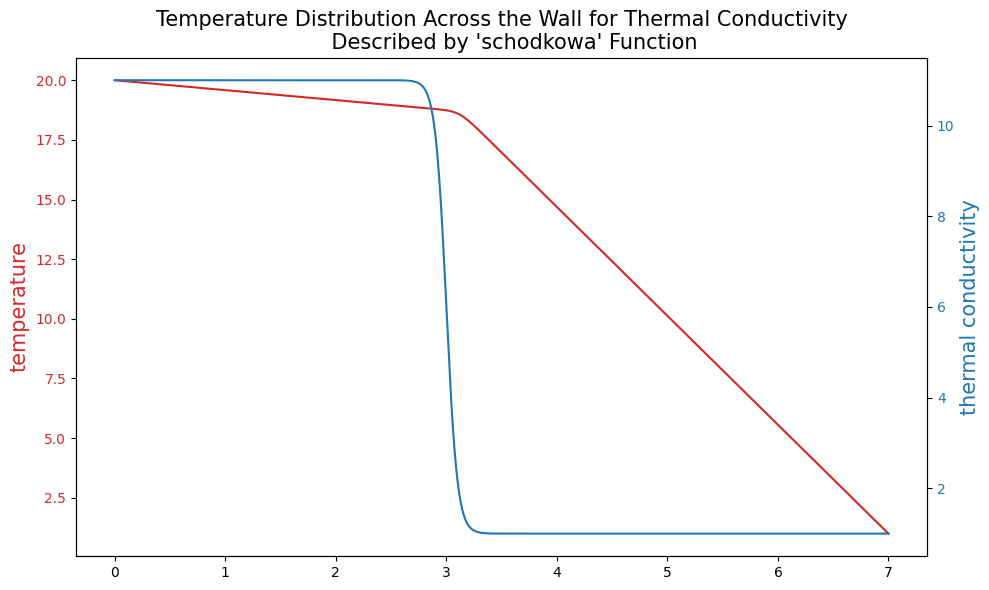

In [13]:
x, FI, Dval = diffusion(step_function, fi_0, fi_N, D_1, D_0, 0.0, 7.0)
myplot(x, FI, Dval, 'schodkowa')